# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1 - Part 3:

In this part, we will apply some of NLP techniques on a dataset containing Wikipedia texts ($\texttt{WikipediaEvents.csv}$ file). The primary goal of this part is to demonstrate how various NLP techniques can be effectively utilized in data science to process and analyze textual data.

## Project Objectives

1. **Text Preprocessing:** Cleaning the text in the dataset for analysis, which includes converting text to lower case, removing punctuation, and eliminating numerical expressions.

2. **Stopwords Removal:** Enhancing feature extraction by omitting commonly occurring words that add little value to the text's meaning.

3. **Tokenization**

4. **GloVe Word to vector conversion:** Using GloVe pre-trained model to assign this convert

### Install important libraries

In [2]:
!pip install nltk
!pip install twython
!pip install textblob
!pip install wordcloud
!pip install minisom

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Import libraries

In [3]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from minisom import MiniSom

### Adjusting row column settings

In [4]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading dataset

In [5]:
df = pd.read_csv("WikipediaEvents.csv", index_col=0)
print("shape of dataset: {}" .format(df.shape))
df.head()

shape of dataset: (473, 1)


,text
0,"January 1, 2022 – The Regional Comprehensive E..."
1,"January 2, 2022 – Abdalla Hamdok resigns as Pr..."
2,"January 4, 2022 – The five permanent members o..."
3,"January 5, 2022 – A nationwide state of emerge..."
4,"January 6, 2022 – The CSTO deploys a ""peacekee..."


## Text preprocessing

In [6]:
df["text"]

0      January 1, 2022 – The Regional Comprehensive E...
1      January 2, 2022 – Abdalla Hamdok resigns as Pr...
2      January 4, 2022 – The five permanent members o...
3      January 5, 2022 – A nationwide state of emerge...
4      January 6, 2022 – The CSTO deploys a "peacekee...
                             ...                        
468    October, 2024 – 2024 Georgian presidential ele...
469     November, 2024 – 2024 Namibian general election.
470    November, 2024 – 2024 Romanian presidential el...
471    November, 2024 – Lee Hsien Loong, Prime Minist...
472    December, 2024 – 2024 Croatian presidential el...
Name: text, Length: 473, dtype: object

### 1. Lowercases, Punctuation, Numbers and Newline Characters

This function performs several cleaning operations on text data:
- Lowercases the text (Case Folding)
- Removes punctuation
- Removes numbers
- Removes newline characters

Parameters:
- text: A pandas Series containing text data.

Returns:
- Series: A pandas Series with cleaned text.

In [7]:
def clean_text(text):
    # lowercasing (Case Folding)
    text = text.str.lower()
    # removing punctuations, numbers, and newline characters
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n", '', regex=True)
    text = text.str.replace('\d', '', regex=True)
    return text

In [8]:
df["text"] = clean_text(df["text"])
df["text"]

0      january    the regional comprehensive economic...
1      january    abdalla hamdok resigns as prime min...
2      january    the five permanent members of the u...
3      january    a nationwide state of emergency is ...
4      january    the csto deploys a peacekeeping mis...
                             ...                        
468            october    georgian presidential election
469                november    namibian general election
470           november    romanian presidential election
471    november   lee hsien loong prime minister of s...
472           december    croatian presidential election
Name: text, Length: 473, dtype: object

### 2. Stopwords Removal
This function filters out common stopwords from the text data. 
Stopwords are removed based on the NLTK's English stopwords list.

Parameters:
- text: A pandas Series containing text data.

Returns:
- Series: A pandas Series with stopwords removed from the text.

In [9]:
nltk.download("stopwords")
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to /home/reza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def remove_stopwords(text):
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [12]:
df["text"] = remove_stopwords(df["text"])
df["text"]

0      january regional comprehensive economic partne...
1      january abdalla hamdok resigns prime minister ...
2      january five permanent members un security cou...
3      january nationwide state emergency declared ka...
4      january csto deploys peacekeeping mission kaza...
                             ...                        
468               october georgian presidential election
469                   november namibian general election
470              november romanian presidential election
471    november lee hsien loong prime minister singap...
472              december croatian presidential election
Name: text, Length: 473, dtype: object

### 3. Tokenization

In [13]:
nltk.download('punkt')
df["text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /home/reza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [january, regional, comprehensive, economic, p...
1      [january, abdalla, hamdok, resigns, prime, min...
2      [january, five, permanent, members, un, securi...
3      [january, nationwide, state, emergency, declar...
4      [january, csto, deploys, peacekeeping, mission...
                             ...                        
468          [october, georgian, presidential, election]
469              [november, namibian, general, election]
470         [november, romanian, presidential, election]
471    [november, lee, hsien, loong, prime, minister,...
472         [december, croatian, presidential, election]
Name: text, Length: 473, dtype: object

### 4. Word to vector embeddings using GloVe pretrained model

This function converts each word in the text to its corresponding vector representation
using a pre-trained GloVe model. If a word is not in the model's vocabulary, it is ignored.

Parameters:
- text: The text to convert.

Returns:
- list: A list of vectors representing the words in the text.


In [14]:
# load glove pretrained model
PATH_in = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.6B.100d.txt"
PATH_out = "/mnt/9636D17436D15639/University/CE/Deep Learning/Dr Safabakhsh/Spring 2024/Dataset/glove.word2vec.txt"

glove2word2vec(PATH_in, PATH_out)

glove_model = KeyedVectors.load_word2vec_format(PATH_out, binary=False)

In [15]:
print(glove_model)

KeyedVectors<vector_size=100, 400000 keys>


In [16]:
def convert_to_vector(text):
    return [glove_model[word] for word in text.split() if word in glove_model]

In [17]:
df["vectors"] = df['text'].apply(convert_to_vector)
df.to_csv("word2vec_out.csv", index=False)
df["vectors"]

0      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
1      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
2      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
3      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
4      [[0.39596, -0.73958, -0.33831, -0.10208, 0.354...
                             ...                        
468    [[0.41278, -0.76503, -0.28583, -0.04694, 0.315...
469    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
470    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
471    [[0.27465, -0.67486, -0.21946, -0.13671, 0.456...
472    [[0.48232, -0.76519, -0.30619, -0.027161, 0.25...
Name: vectors, Length: 473, dtype: object

In [18]:
data = df.values
print(data.shape)
# data

(473, 2)


### Visualize vector representation

In [20]:
# extract the word vectors and their corresponding words
words = []
vectors = []
for _, row in df.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words.append(word)
        vectors.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors = np.array(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(20, 20))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d)))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c=colors, alpha=0.6, s=50, marker='.')

for word, (x, y) in zip(words, vectors_2d):
    plt.text(x, y, word, fontsize=8)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

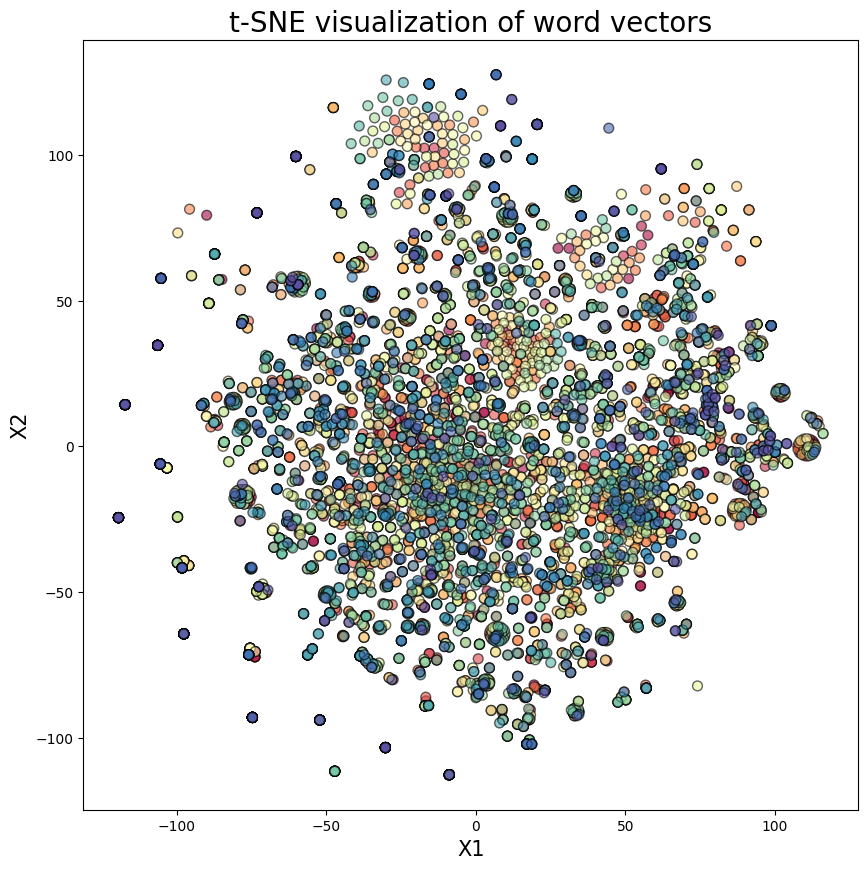

In [50]:
# extract the word vectors and their corresponding words
words = []
vectors = []
for _, row in df.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        words.append(word)
        vectors.append(vector)

# use t-SNE to reduce the dimension of the vectors to 2D
vectors = np.array(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# vrctors_2d = vectors.reshape(-1, 2)

plt.figure(figsize=(10, 10))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(vectors_2d)))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c=colors, alpha=0.6, s=50)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

In [51]:
print(vectors.shape)
# print(vectors)

print(vectors_2d.shape)
# print(vectors_2d)

vectors = vectors.reshape(-1, 2)
print(vectors.shape)
# print(vectors)

(7465, 100)
(7465, 2)
(373250, 2)


### Define and Train SOM network
With this class we can train SOM.

A rule of thumb to set the size of the grid for a dimensionality
reduction task is that it should contain 5*sqrt(N) neurons
where N is the number of samples in the dataset to analyze.

E.g. if your dataset has 150 samples, 5*sqrt(150) = 61.23
hence a map 8-by-8 should perform well.

### Parameters

$\texttt{x}$ : $\texttt{int}$
- $\texttt{x}$ dimension of the SOM.

$\texttt{y}$ : $\texttt{int}$
- $\texttt{y}$ dimension of the SOM.

$\texttt{input\_len}$ : $\texttt{int}$
- Number of the elements of the vectors in input.

- sigma: $\texttt{float}$, optional (default=1.0)
Spread of the neighborhood function, needs to be adequate
to the dimensions of the map.

(at the iteration t we have $\sigma(t)=\frac{\sigma}{1+\frac{t}{T}}$
where $T$ is $\frac{\text{number of iteration}}{2}$)

- learning_rate : initial learning rate
(at the iteration t we have

$\text{learning rate(t)} = \frac{\text{learning rate}}{1+\frac{t}{T}}$
where $T$ is $\frac{\text{number of iteration}}{2}$)

In [97]:
som_shape = (2, 3)
som = MiniSom(som_shape[0], som_shape[1], vectors_2d.shape[1], sigma=0.5, learning_rate=0.1,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(vectors_2d, 50000, verbose=True)

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 30.247671225311823


### Plot clusters on all data

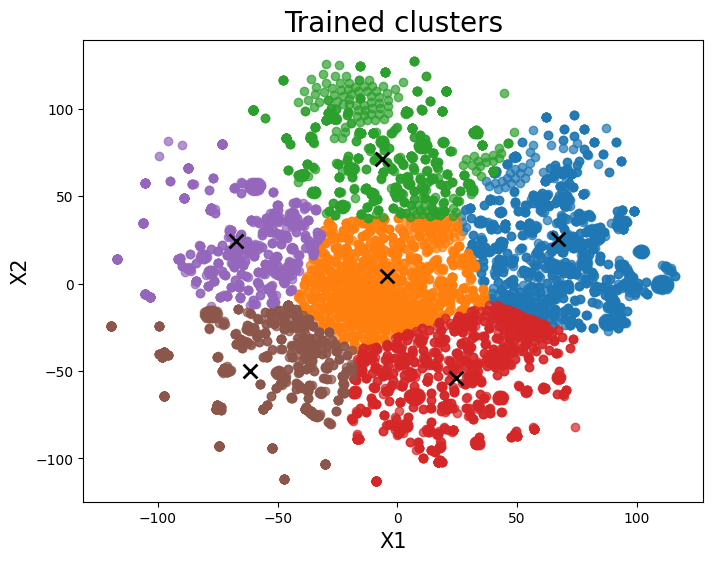

In [98]:
winner_coordinates = np.array([som.winner(x) for x in vectors_2d]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(8, 6))
for c in np.unique(cluster_index):
    plt.scatter(vectors_2d[cluster_index == c, 0],
                vectors_2d[cluster_index == c, 1], label="cluster="+str(c), alpha=0.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label="centroid")

### plot random sets

In [1]:
random_rows = df.sample(n=50)

random_words = []
random_vectors = []

# Iterate over the random rows
for _, row in random_rows.iterrows():
    for word, vector in zip(row["text"].split(), row["vectors"]):
        random_words.append(word)
        random_vectors.append(vector)

print(random_rows.shape)
print(len(random_words))
print(len(random_vectors))


# use t-SNE to reduce the dimension of the vectors to 2D
random_vectors = np.array(random_vectors)
random_tsne = TSNE(n_components=2, random_state=0)
random_vectors_2d = tsne.fit_transform(random_vectors)

print(random_vectors.shape)
print(random_vectors_2d.shape)


plt.figure(figsize=(20, 20))
cmap = plt.get_cmap("Spectral")
colors = cmap(np.linspace(0, 1, len(random_vectors_2d)))
plt.scatter(random_vectors_2d[:, 0], random_vectors_2d[:, 1], edgecolors='k', c=colors, alpha=1, marker='.', s=100)

for word, (x, y) in zip(random_words, random_vectors_2d):
    plt.text(x, y, word, fontsize=10)

plt.title("t-SNE visualization of word vectors", fontsize=20)
plt.xlabel("X1", fontsize=15)
plt.ylabel("X2", fontsize=15)

plt.show()

NameError: name 'df' is not defined

### Train and Plot clusters on 50 random data

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 31.25185951023587


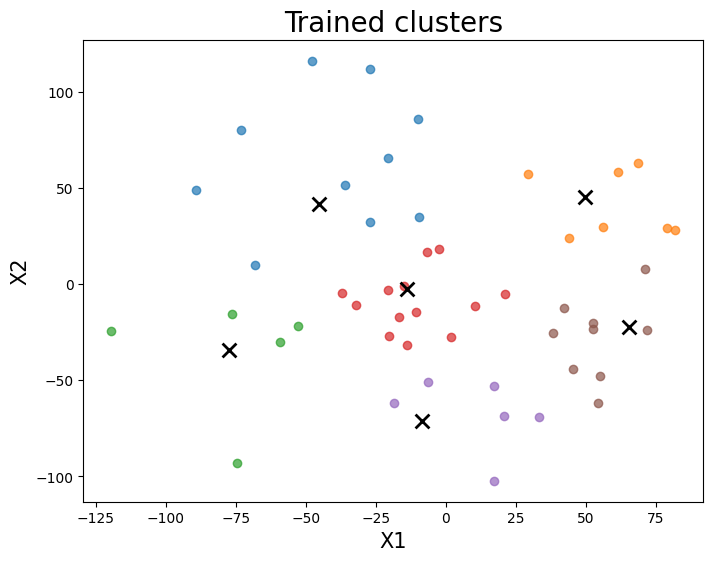

In [101]:
random_sample_size = 50
random_indices = np.random.choice(vectors_2d.shape[0], size=random_sample_size, replace=False)
random_points = vectors_2d[random_indices]


som_shape = (2, 3)
som = MiniSom(som_shape[0], som_shape[1], random_points.shape[1], sigma=0.5, learning_rate=0.5,
            neighborhood_function='gaussian', random_seed=10)

som.train_batch(vectors_2d, 50000, verbose=True)

winner_coordinates = np.array([som.winner(x) for x in random_points]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


plt.figure(figsize=(8, 6))
for c in np.unique(cluster_index):
    plt.scatter(random_points[cluster_index == c, 0],
                random_points[cluster_index == c, 1], label='cluster='+str(c), alpha=0.7)
    plt.title("Trained clusters", fontsize=20)
    plt.xlabel("X1", fontsize=15)
    plt.ylabel("X2", fontsize=15)

for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=100, linewidths=2, color='k', label='centroid')